# 📊 1. Veri Yükleme ve İlk Bakış

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


# 🔍 2. Eksik Veri Analizi

In [10]:
missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100

missing_df = pd.DataFrame({
    'Eksik_Sayı': missing,
    'Yüzde': missing_percent
})

missing_df = missing_df[missing_df['Eksik_Sayı'] > 0].sort_values('Eksik_Sayı', ascending=False)
print(missing_df)

          Eksik_Sayı      Yüzde
Cabin            687  77.104377
Age              177  19.865320
Embarked           2   0.224467


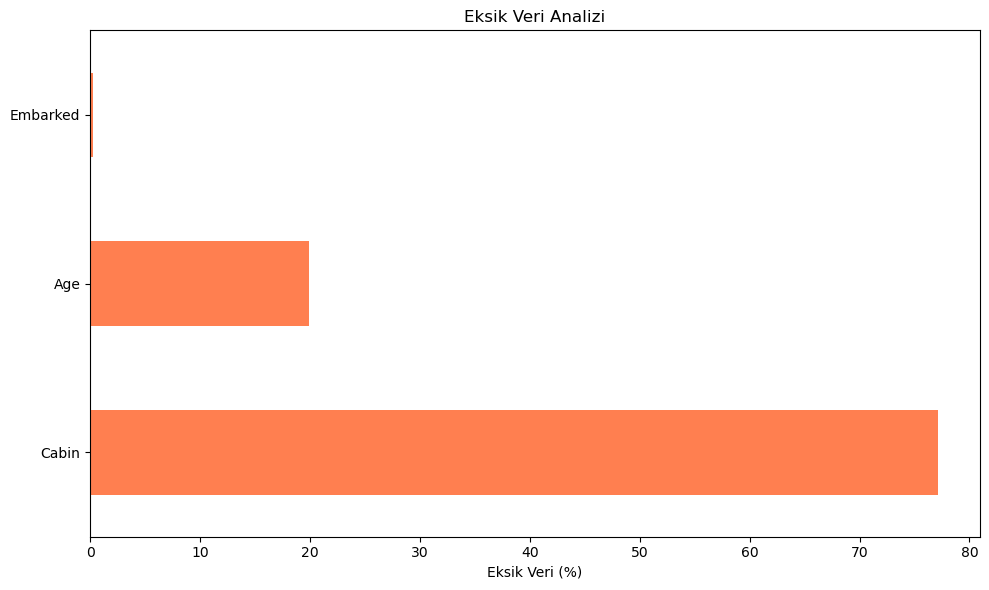

In [11]:
plt.figure(figsize = (10,6))
missing_df["Yüzde"].plot(kind = "barh",color = "coral")
plt.xlabel("Eksik Veri (%)")
plt.title('Eksik Veri Analizi')
plt.tight_layout()
plt.savefig('../figures/missing_data.png', dpi=300, bbox_inches='tight')
plt.show()

**Bulgular:**
- Age: 177 eksik (%19.9)
- Cabin: 687 eksik (%77.1)
- Embarked: 2 eksik

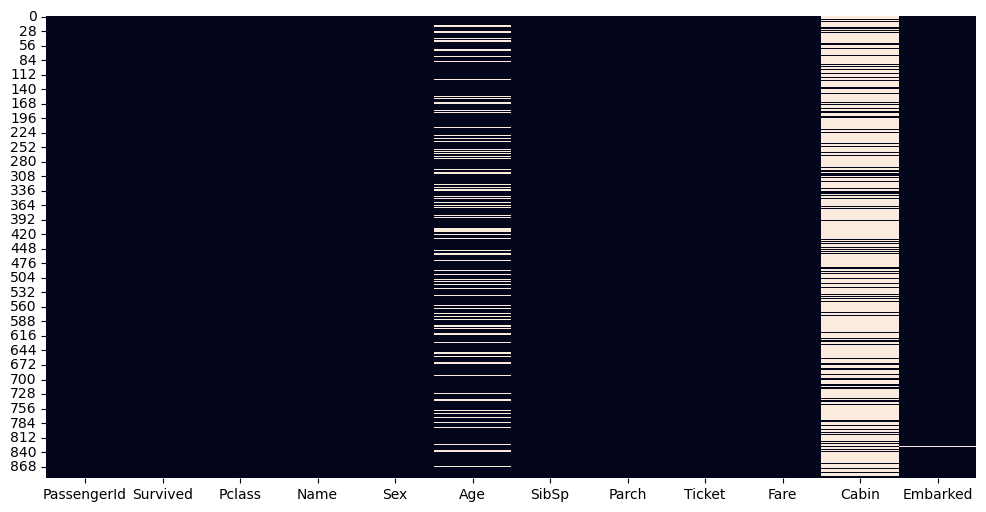

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False)
plt.savefig('../figures/missing_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
train['Cabin_missing'] = train['Cabin'].isnull()
train.groupby('Cabin_missing')['Pclass'].value_counts(normalize=True)

Cabin_missing  Pclass
False          1         0.862745
               2         0.078431
               3         0.058824
True           3         0.697234
               2         0.244541
               1         0.058224
Name: proportion, dtype: float64

In [14]:
train['Age_missing'] = train['Age'].isnull()
train.groupby('Age_missing')['Survived'].mean()

Age_missing
False    0.406162
True     0.293785
Name: Survived, dtype: float64

## Bulgular (Missing Pattern Analizi)

### Cabin Eksikliği
- `Cabin` verisi **eksik olmayan** yolcuların büyük kısmı **1. sınıf** (%86).
- `Cabin` verisi **eksik olan** yolcuların büyük kısmı **3. sınıf** (%69).
- Bu durum `Cabin` eksikliğinin **rastgele olmadığını**, `Pclass` ile güçlü şekilde ilişkili olduğunu gösterir (pattern var).

### Age Eksikliği
- `Age` eksik olmayanların hayatta kalma oranı: **%40.6**
- `Age` eksik olanların hayatta kalma oranı: **%29.4**
- Bu fark, `Age` eksikliğinin **Survived ile ilişkili olabileceğini** ve tamamen rastgele olmadığını gösterir (pattern ihtimali var).

# 📈 3. Hedef Değişken Analizi (Survived)

In [15]:
train["Survived"].value_counts()
print(train['Survived'].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [16]:
train['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

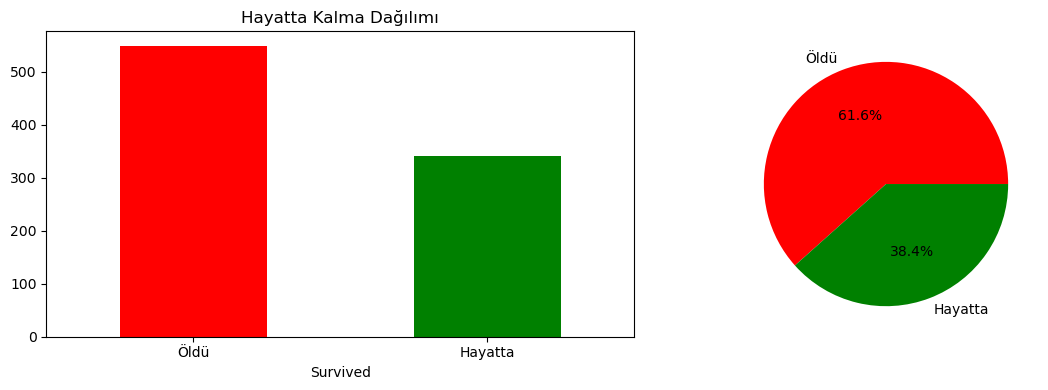

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train['Survived'].value_counts().plot(kind='bar', ax=ax[0], color=['red', 'green'])
ax[0].set_xticklabels(['Öldü', 'Hayatta'], rotation=0)
ax[0].set_title('Hayatta Kalma Dağılımı')

ax[1].pie(train['Survived'].value_counts(), labels=['Öldü', 'Hayatta'], 
          autopct='%1.1f%%', colors=['red', 'green'])

plt.tight_layout()
plt.savefig('../figures/survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Hayatta Kalma Dağılımı Bulguları

- Titanic veri setinde yolcuların **%61.6’sı ölmüş**, **%38.4’ü hayatta kalmıştır**.
- Sınıflar arasında belirgin bir dengesizlik vardır (ölüler daha fazla).
- Veri seti **imbalanced** yapıdadır ancak aşırı dengesiz değildir (moderate imbalance).

# 🔢 4. Sayısal Değişkenler Analizi

### Age analizi:

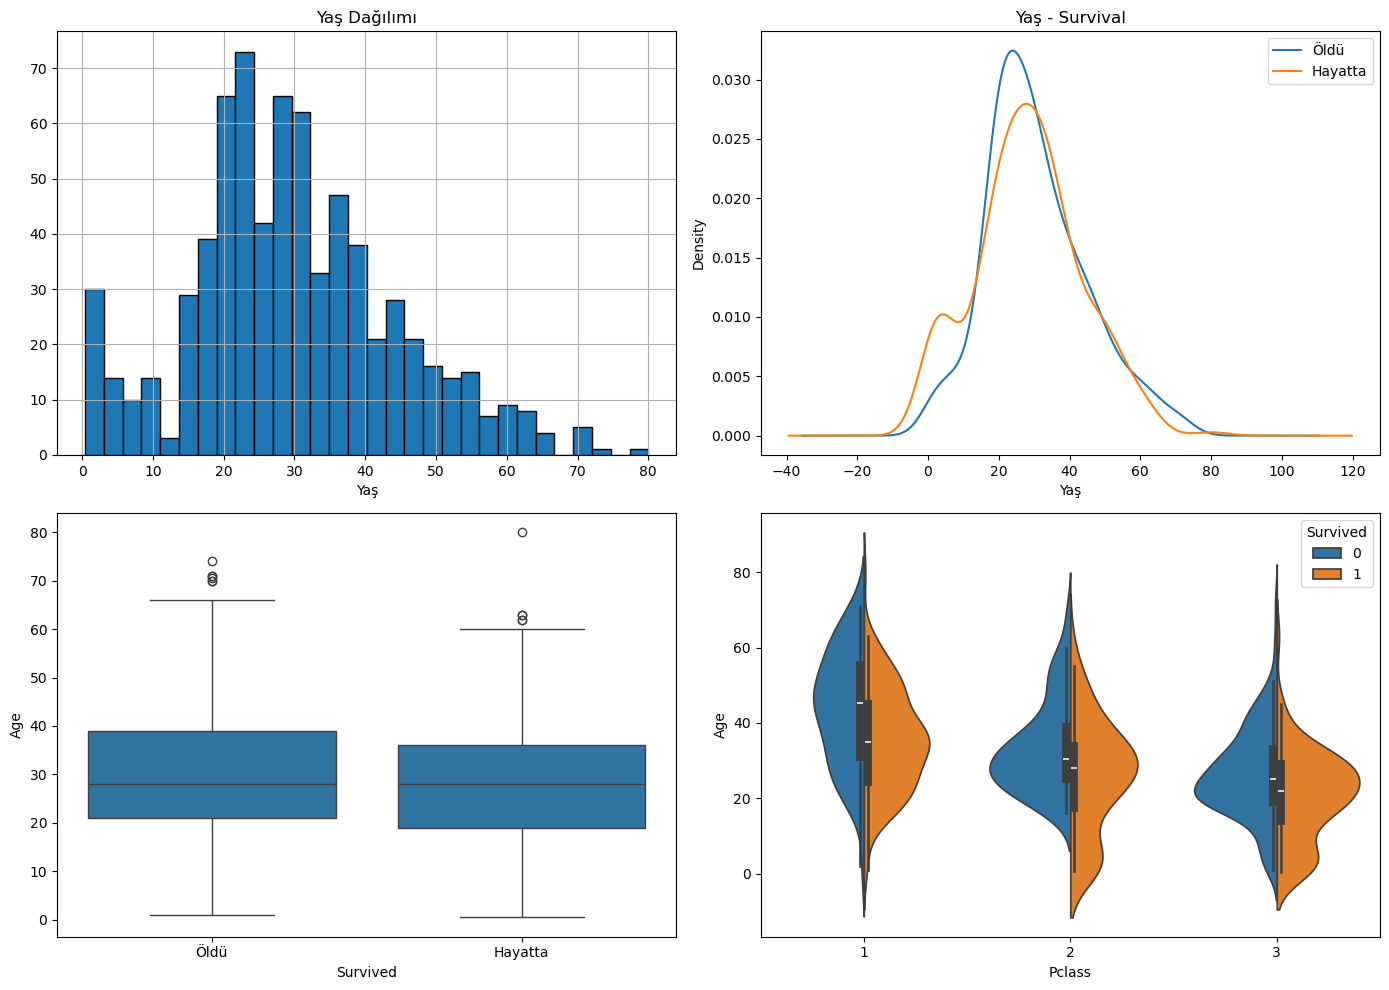

In [18]:
# Age dağılımı
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
train['Age'].hist(bins=30, ax=ax[0, 0], edgecolor='black')
ax[0, 0].set_xlabel('Yaş')
ax[0, 0].set_title('Yaş Dağılımı')

# Survival'a göre
train[train['Survived']==0]['Age'].plot(kind='density', ax=ax[0, 1], label='Öldü')
train[train['Survived']==1]['Age'].plot(kind='density', ax=ax[0, 1], label='Hayatta')
ax[0, 1].set_xlabel('Yaş')
ax[0, 1].set_title('Yaş - Survival')
ax[0, 1].legend()

# Box plot
sns.boxplot(data=train, x='Survived', y='Age', ax=ax[1, 0])
ax[1, 0].set_xticks([0, 1])
ax[1, 0].set_xticklabels(['Öldü', 'Hayatta'])

# Violin plot
sns.violinplot(data=train, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[1, 1])

plt.tight_layout()
plt.savefig('../figures/age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


## Yaş (Age) Dağılımı Bulguları

- Yolcuların yaşları en çok **20–40 yaş aralığında** yoğunlaşmaktadır.
- Yaş dağılımı **sağa çarpık** görünmektedir (ileri yaşlarda az sayıda yolcu var).
- **0–10 yaş** aralığında da belirli bir yoğunluk vardır (çocuk yolcular mevcut).

## Yaş - Survival (KDE / Density) Bulguları
- Hayatta kalanlarda **küçük yaşlarda (çocuklarda)** yoğunluk daha fazladır.
- Ölenlerde yoğunluk özellikle **20–40 yaş aralığında** daha yüksektir.
- Bu durum yaşın hayatta kalma üzerinde etkili olabileceğini gösterir.

## Boxplot Bulguları
- Ölenler ve hayatta kalanların **medyan yaşları birbirine yakın** olsa da,
  hayatta kalanlarda yaş dağılımı daha çok **genç yaşlara kaymaktadır**.
- Her iki grupta da **yüksek yaş outlier’ları** (70+ yaş) bulunmaktadır.

## Violin Plot (Pclass - Age - Survival) Bulguları
- **1. sınıf yolcular** genel olarak daha yaşlı ve hayatta kalma oranı daha yüksektir.
- **3. sınıfta** yaşlar daha genç yoğunlaşmasına rağmen hayatta kalma daha düşüktür.
- `Pclass` ve `Age` değişkenleri birlikte survival üzerinde belirgin etkiye sahiptir.

**Yaş grupları:**

In [19]:
train["AgeGroup"] = pd.cut(train["Age"],bins = [0,12,18,35,60,80],labels = ["Çocuk","Genç","Yetişkin","Orta yaş","Yaşlı"])
age_survival = train.groupby("AgeGroup",observed = True)["Survived"].mean()
print(age_survival)

AgeGroup
Çocuk       0.579710
Genç        0.428571
Yetişkin    0.382682
Orta yaş    0.400000
Yaşlı       0.227273
Name: Survived, dtype: float64


In [20]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

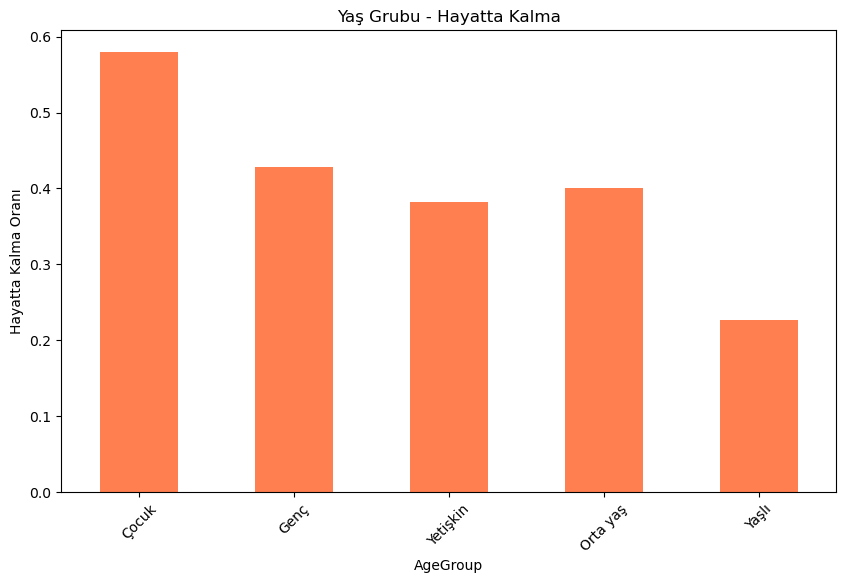

In [21]:
age_survival.plot(kind = "bar",color = "coral",figsize = (10,6))
plt.ylabel('Hayatta Kalma Oranı')
plt.title('Yaş Grubu - Hayatta Kalma')
plt.xticks(rotation=45)
plt.savefig('../figures/survival_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

## Yaş Grubu - Hayatta Kalma Bulguları

- **Çocuklar** en yüksek hayatta kalma oranına sahiptir (~%58).
- **Gençler** ikinci en yüksek hayatta kalma oranına sahiptir (~%43).
- **Yetişkin** ve **Orta yaş** gruplarında hayatta kalma oranı birbirine yakındır (~%38–40).
- **Yaşlılar** en düşük hayatta kalma oranına sahiptir (~%23).
- Genel olarak yaş arttıkça hayatta kalma oranı düşmektedir.

### Fare (Bilet ücreti)

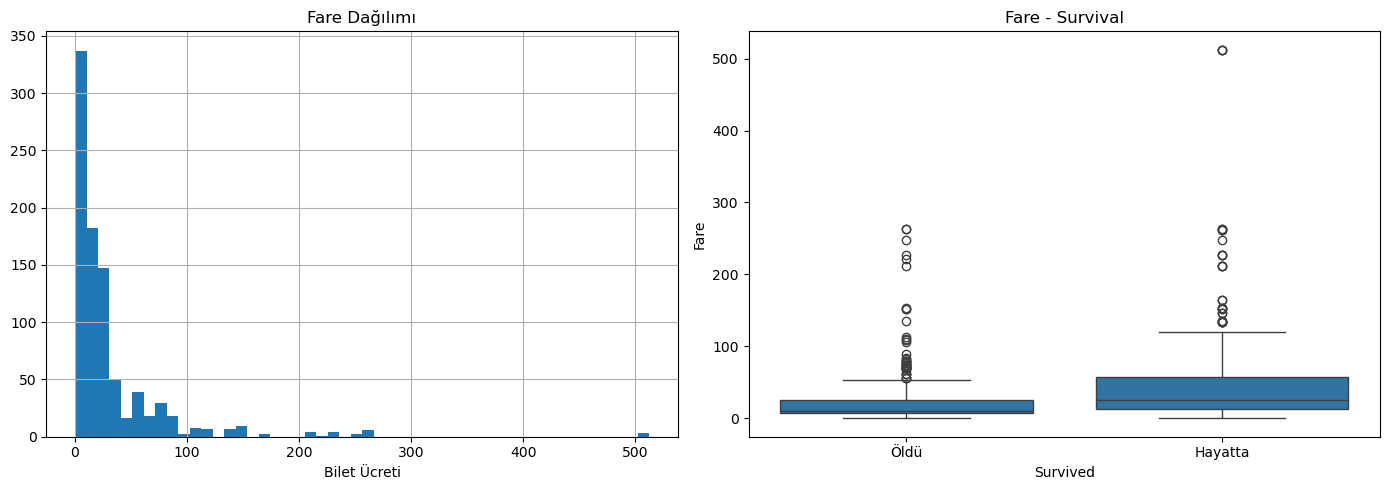

In [22]:
fig, ax = plt.subplots(1,2 ,figsize = (14,5))

train["Fare"].hist(bins=50,ax=ax[0])
ax[0].set_xlabel('Bilet Ücreti')
ax[0].set_title('Fare Dağılımı')

sns.boxplot(data=train,x="Survived",y="Fare",ax=ax[1])
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['Öldü', 'Hayatta'])
ax[1].set_title('Fare - Survival')
plt.tight_layout()
plt.savefig('../figures/fare_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Fare (Bilet Ücreti) Analizi Bulguları

- **Fare dağılımı sağa çarpık (right-skewed)**: Yolcuların büyük kısmı düşük ücretli bilet almıştır.
- Çok az sayıda yolcu **çok yüksek bilet ücretleri** ödemiştir (uç değerler/outlier mevcut).
- **Boxplot sonucuna göre hayatta kalanların bilet ücretleri genel olarak daha yüksektir.**
- Hayatta kalan grubun **medyan Fare değeri**, ölenlere göre daha yüksektir.
- Bu durum, **yüksek ücret ödeyenlerin (muhtemelen 1. sınıf yolcuların)** hayatta kalma ihtimalinin daha yüksek olduğunu göstermektedir.

### SibSp (Kardeş/Eş sayısı) ve Parch (Ebeveyn/Çocuk sayısı):

In [23]:
train["SibSp"].value_counts()
train["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

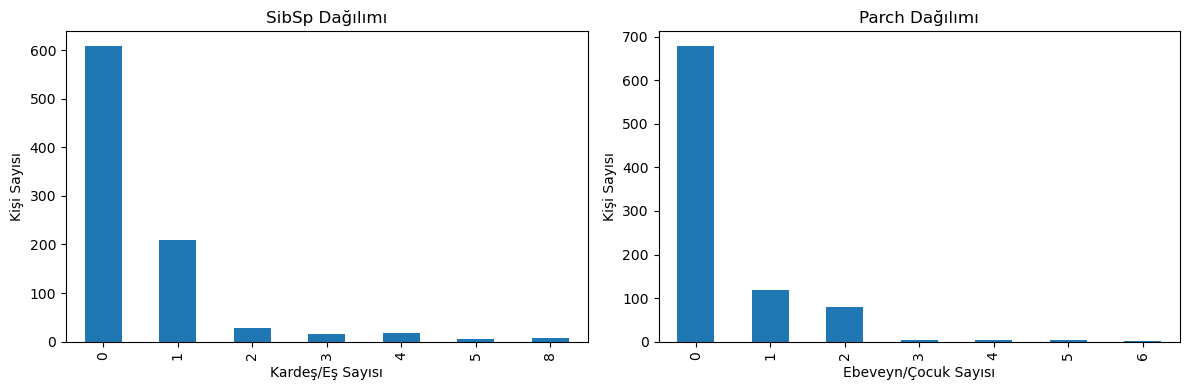

In [24]:
fig, ax = plt.subplots(1,2,figsize = (12,4))

train["SibSp"].value_counts().sort_index().plot(kind="bar",ax=ax[0])
ax[0].set_title("SibSp Dağılımı")
ax[0].set_xlabel("Kardeş/Eş Sayısı")
ax[0].set_ylabel("Kişi Sayısı")

train["Parch"].value_counts().sort_index().plot(kind="bar",ax=ax[1])
ax[1].set_title("Parch Dağılımı")
ax[1].set_xlabel("Ebeveyn/Çocuk Sayısı")
ax[1].set_ylabel("Kişi Sayısı")

plt.savefig("../figures/sibsp_parch_distribution.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

## SibSp ve Parch Dağılımı Bulguları

- Yolcuların büyük çoğunluğu **yalnız** seyahat etmiştir:
  - **SibSp = 0** (kardeş/eş yok) en yüksek frekansa sahiptir.
  - **Parch = 0** (ebeveyn/çocuk yok) en yüksek frekansa sahiptir.
- Aile ile seyahat edenlerin sayısı daha azdır:
  - SibSp ve Parch değerleri arttıkça yolcu sayısı hızlı şekilde düşmektedir.
- Çok büyük ailelerle seyahat edenler oldukça nadirdir (SibSp ≥ 4 veya Parch ≥ 3 çok az gözüküyor).

In [25]:
train.groupby("SibSp")["Survived"].mean()
train.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

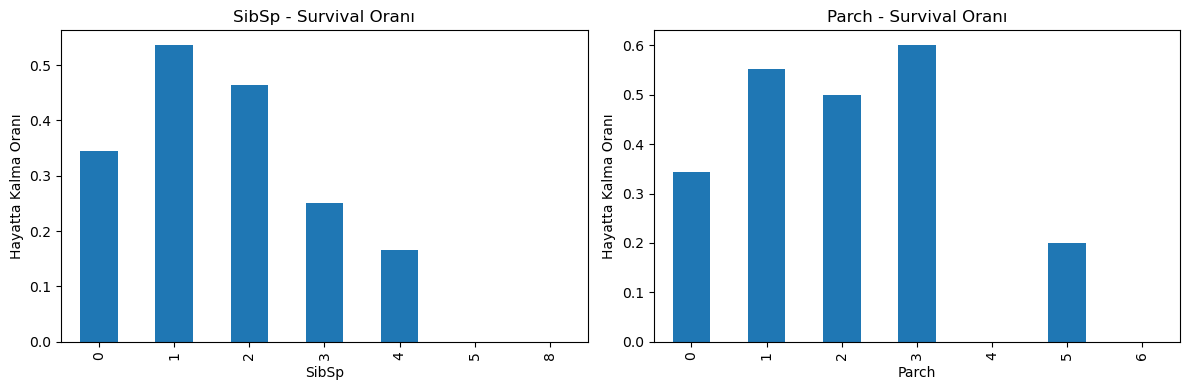

In [26]:
fig, ax = plt.subplots(1,2,figsize = (12,4))

train.groupby("SibSp")["Survived"].mean().plot(kind="bar",ax=ax[0])
ax[0].set_title("SibSp - Survival Oranı")
ax[0].set_ylabel("Hayatta Kalma Oranı")

train.groupby("Parch")["Survived"].mean().plot(kind="bar",ax=ax[1])
ax[1].set_title("Parch - Survival Oranı")
ax[1].set_ylabel("Hayatta Kalma Oranı")

plt.savefig("../figures/sibsp_parch_survival.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

## SibSp ve Parch - Survival Bulguları

### SibSp (Kardeş/Eş sayısı)
- **SibSp = 1** olan yolcuların hayatta kalma oranı en yüksektir (~%54).
- **SibSp = 2** olanlarda hayatta kalma oranı hala yüksektir (~%46).
- **SibSp = 0** (yalnız seyahat edenler) daha düşük hayatta kalma oranına sahiptir (~%34).
- **SibSp ≥ 3** olduğunda hayatta kalma oranı belirgin şekilde düşmektedir.
- Çok yüksek SibSp değerlerinde (5 ve 8) hayatta kalma oranı neredeyse sıfırdır (çok az veri olduğu için etkisi sınırlı olabilir).

### Parch (Ebeveyn/Çocuk sayısı)
- **Parch = 1, 2, 3** olan yolcuların hayatta kalma oranı yüksektir (~%50–60).
- **Parch = 0** olan yolcuların hayatta kalma oranı daha düşüktür (~%34).
- **Parch değeri çok yükseldiğinde** (5-6 gibi) hayatta kalma oranı tekrar düşmektedir.

### Genel Yorum
- Küçük aile ile seyahat etmek (1-3 kişi yakın akraba) hayatta kalma ihtimalini artırıyor.
- Çok büyük ailelerde hayatta kalma oranı düşüyor (muhtemelen karmaşa ve hareket zorluğu).

In [27]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train.groupby("FamilySize")["Survived"].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

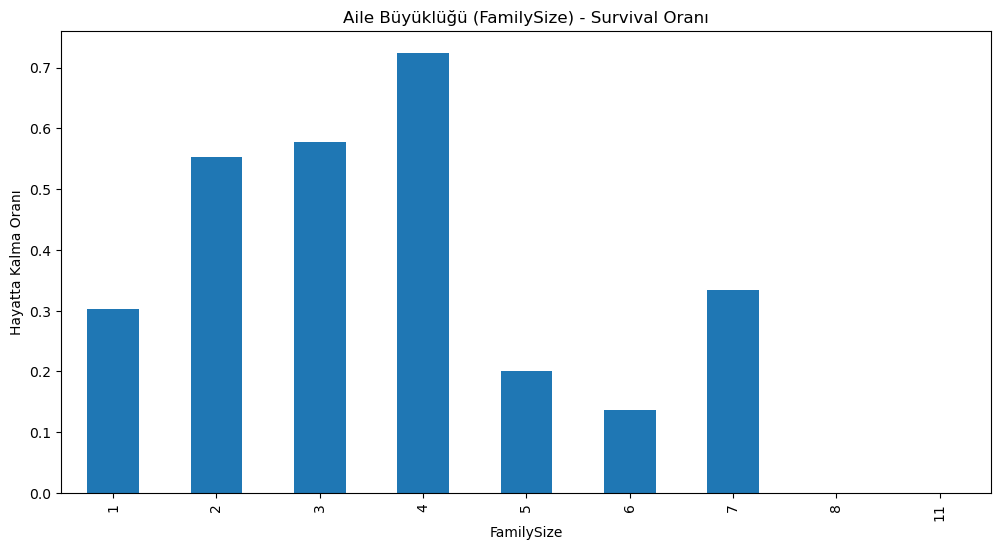

In [28]:
train.groupby("FamilySize")["Survived"].mean().plot(kind="bar",figsize=(12,6))
plt.title("Aile Büyüklüğü (FamilySize) - Survival Oranı")
plt.ylabel("Hayatta Kalma Oranı")
plt.savefig("../figures/family_size_survival.png", dpi=300, bbox_inches="tight")
plt.show()

## FamilySize (Aile Büyüklüğü) - Survival Bulguları

- **Yalnız yolcular (FamilySize = 1)** daha düşük hayatta kalma oranına sahiptir (~%30).
- **Küçük aileler (2-4 kişi)** en yüksek hayatta kalma oranına sahiptir.
  - Özellikle **FamilySize = 4** en yüksek oranı göstermektedir (~%72).
- **Aile büyüklüğü arttıkça** (5-6 gibi) hayatta kalma oranı ciddi şekilde düşmektedir (~%13–20).
- Çok büyük ailelerde (8 ve üzeri) hayatta kalma oranı neredeyse yoktur (veri sayısı çok az olabilir).

### Genel Yorum
- **En avantajlı grup küçük ailelerdir (2-4 kişi).**
- **Çok kalabalık aileler** gemiden kaçışta dezavantajlı olmuş olabilir.

# 🏷️ 5. Kategorik Değişkenler Analizi

### Pclass (Yolcu sınıfı)

In [29]:
print(train.groupby("Pclass")["Survived"].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [30]:
train.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

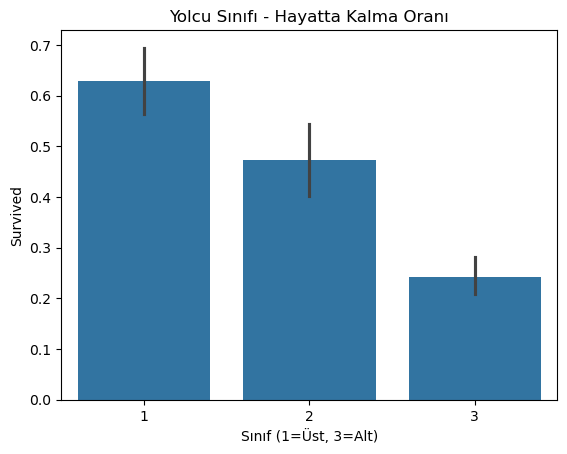

In [31]:
sns.barplot(data=train,x="Pclass",y="Survived")
plt.title('Yolcu Sınıfı - Hayatta Kalma Oranı')
plt.xlabel('Sınıf (1=Üst, 3=Alt)')
plt.savefig('../figures/survival_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

## Pclass (Yolcu Sınıfı) - Hayatta Kalma Bulguları

- **1. sınıf yolcular** en yüksek hayatta kalma oranına sahiptir (~%63).
- **2. sınıf yolcular** orta seviyede hayatta kalma oranına sahiptir (~%47-48).
- **3. sınıf yolcular** en düşük hayatta kalma oranına sahiptir (~%24-25).
- Genel olarak **sınıf seviyesi arttıkça (1’e yaklaştıkça) hayatta kalma oranı artmaktadır**.
- Bu durum, üst sınıftaki yolcuların cankurtaranlara erişimde daha avantajlı olduğunu göstermektedir.

In [32]:
pclass_sex_survival = train.groupby(["Pclass","Sex"])["Survived"].mean().unstack()
print(pclass_sex_survival)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


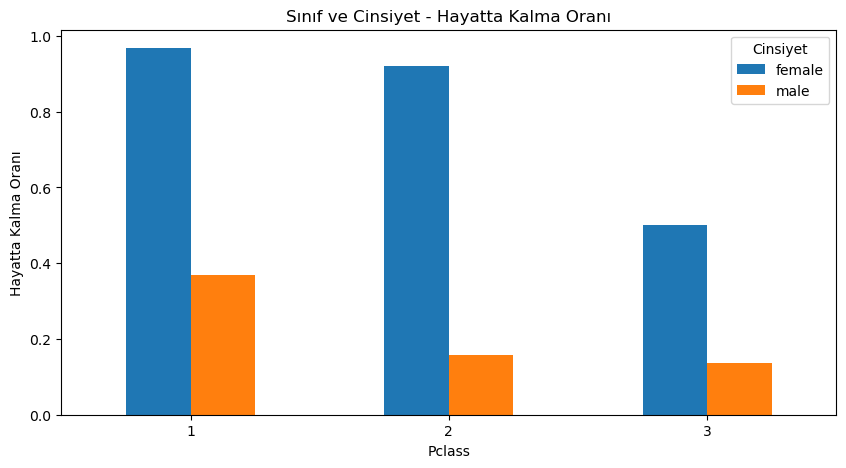

In [33]:
pclass_sex_survival.plot(kind="bar",figsize=(10,5))
plt.ylabel('Hayatta Kalma Oranı')
plt.title('Sınıf ve Cinsiyet - Hayatta Kalma Oranı')
plt.xticks(rotation=0)
plt.legend(title='Cinsiyet')
plt.savefig('../figures/survival_class_gender.png', dpi=300, bbox_inches='tight')
plt.show()

### Pclass + Cinsiyet (Sex) - Hayatta Kalma Bulguları

- Tüm sınıflarda **kadınların hayatta kalma oranı erkeklerden çok daha yüksektir**.
- **1. sınıf kadınlar** neredeyse tamamen hayatta kalmıştır (~%97).
- **2. sınıf kadınlar** çok yüksek hayatta kalma oranına sahiptir (~%92).
- **3. sınıf kadınlar** diğer kadınlara göre daha düşük olsa da yine yüksektir (~%50).

- Erkeklerde hayatta kalma oranı genel olarak düşüktür:
  - **1. sınıf erkekler** orta seviyede hayatta kalmıştır (~%37).
  - **2. sınıf erkekler** düşük hayatta kalmıştır (~%16).
  - **3. sınıf erkekler** en düşük hayatta kalma oranına sahiptir (~%13-14).

#### Genel Sonuç
- Hayatta kalmayı en çok etkileyen faktörler: **Cinsiyet + Yolcu sınıfı**.
- Bu sonuç “**kadınlar ve çocuklar önce**” kuralını güçlü şekilde desteklemektedir.

## Sex (Cinsiyet)

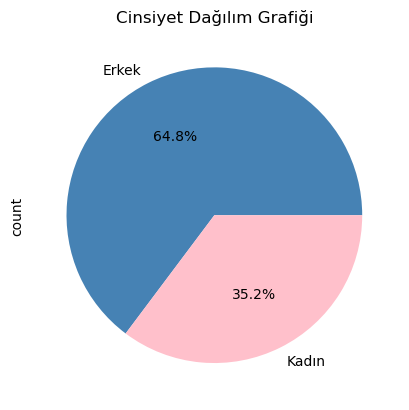

In [34]:
train["Sex"].value_counts().plot(kind="pie",labels = ["Erkek","Kadın"],autopct='%1.1f%%', colors=['steelblue', 'pink'])
plt.title("Cinsiyet Dağılım Grafiği")
plt.savefig('../figures/sex_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
print(train.groupby("Sex")["Survived"].mean() * 100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


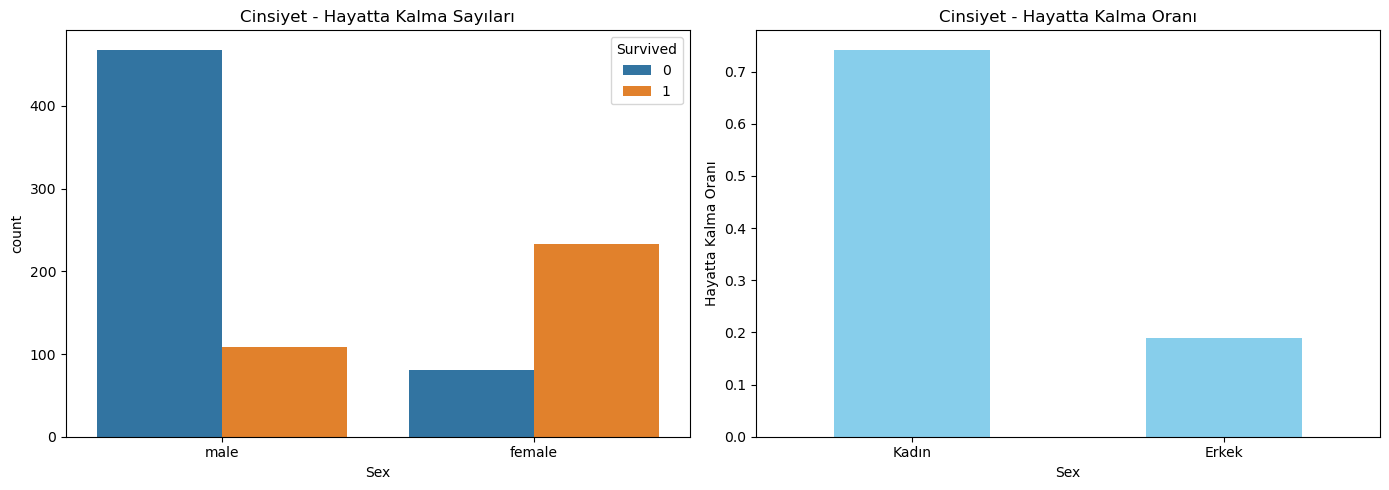

In [36]:
fig, ax = plt.subplots(1 , 2 , figsize = (14,5))

sns.countplot(data = train,x="Sex",hue="Survived",ax=ax[0])
ax[0].set_title('Cinsiyet - Hayatta Kalma Sayıları')

train.groupby("Sex")["Survived"].mean().plot(kind="bar",ax=ax[1],color="skyblue")
ax[1].set_ylabel('Hayatta Kalma Oranı')
ax[1].set_title('Cinsiyet - Hayatta Kalma Oranı')
ax[1].set_xticklabels(['Kadın', 'Erkek'], rotation=0)

plt.tight_layout()
plt.savefig('../figures/survival_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

#### ✅ Bulgular (Cinsiyet - Survival)

- **Kadınların hayatta kalma oranı çok yüksektir (~%74-75).**
- **Erkeklerin hayatta kalma oranı oldukça düşüktür (~%18-19).**
- Sayısal olarak da:
  - Erkeklerde **ölüm sayısı çok fazla**, hayatta kalan az.
  - Kadınlarda ise **hayatta kalan sayısı ölenlerden fazladır.**

📌 Sonuç: Titanic kazasında **cinsiyet hayatta kalmayı en güçlü etkileyen değişkenlerden biridir**. Kadınlar belirgin şekilde daha avantajlıdır.

## Embarked (Biniş limanı - C=Cherbourg, Q=Queenstown, S=Southampton)

In [37]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [38]:
print(train.groupby('Embarked')['Survived'].mean() * 100)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


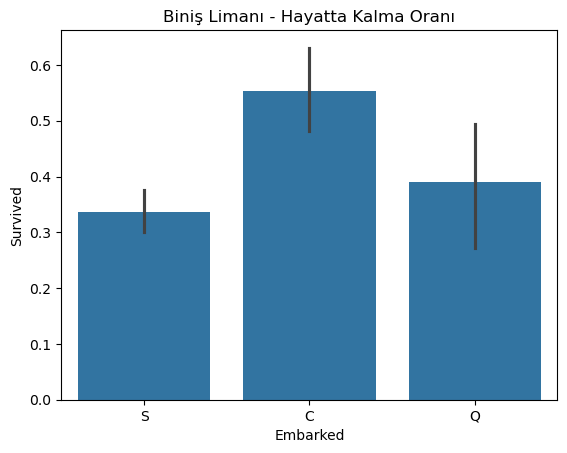

In [39]:
sns.barplot(data = train, x="Embarked", y="Survived" )
plt.title('Biniş Limanı - Hayatta Kalma Oranı')
plt.savefig('../figures/survival_by_embarked.png', dpi=300, bbox_inches='tight')
plt.show()

### ✅ Bulgular (Embarked - Biniş Limanı & Survival)

- **C limanından binen yolcuların hayatta kalma oranı en yüksektir (~%55).**
- **Q limanından binen yolcular orta seviyededir (~%39-40).**
- **S limanından binen yolcuların hayatta kalma oranı en düşüktür (~%33-34).**

📌 Sonuç: Hayatta kalma oranı limana göre değişmektedir.  
Özellikle **C limanı**, muhtemelen daha yüksek sınıf yolcularla ilişkili olduğu için daha avantajlı görünmektedir.

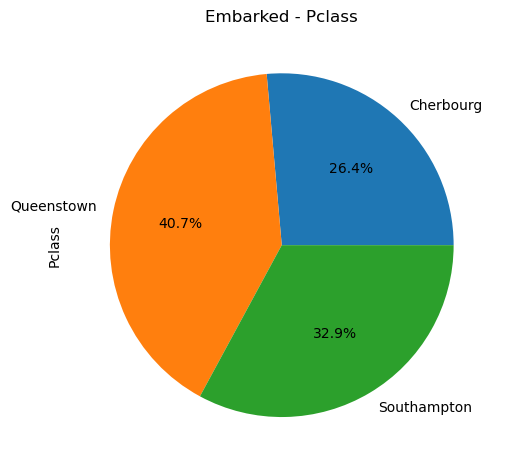

In [40]:
train.groupby("Embarked")["Pclass"].mean().plot(kind="pie",labels = ["Cherbourg","Queenstown","Southampton"],autopct='%1.1f%%')
plt.title("Embarked - Pclass",rotation=0)
plt.tight_layout()
plt.savefig('../figures/embarked_pclass_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Cabin (Kabin)

In [41]:
train["CabinKnown"] = train["Cabin"].notnull().astype(int)
train["CabinKnown"].value_counts()

CabinKnown
0    687
1    204
Name: count, dtype: int64

In [42]:
train.groupby("CabinKnown")["Survived"].mean() * 100

CabinKnown
0    29.985444
1    66.666667
Name: Survived, dtype: float64

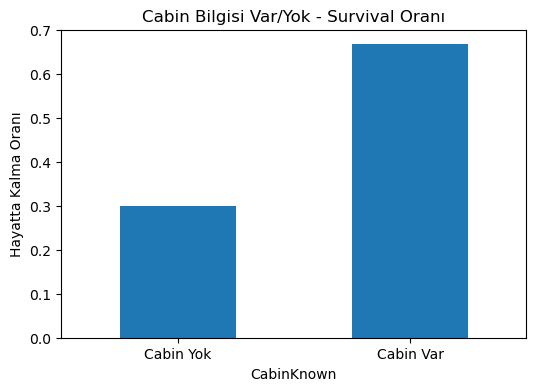

In [43]:
train.groupby("CabinKnown")["Survived"].mean().plot(kind="bar",figsize=(6,4))
plt.title("Cabin Bilgisi Var/Yok - Survival Oranı")
plt.ylabel("Hayatta Kalma Oranı")
plt.xticks([0,1], ["Cabin Yok", "Cabin Var"], rotation=0)
plt.savefig('../figures/cabinknown_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### ✅ Bulgular (Cabin Bilgisi Var/Yok - Survival)

- **Cabin bilgisi olan yolcuların hayatta kalma oranı çok daha yüksektir (~%67).**
- **Cabin bilgisi olmayan yolcuların hayatta kalma oranı oldukça düşüktür (~%30).**
- Bu durum, Cabin bilgisinin genellikle **üst sınıf (Pclass=1-2)** yolcularla ilişkili olduğunu ve
  onların **can filikalarına daha yakın / daha avantajlı** konumda bulunduğunu göstermektedir.

📌 Sonuç: **Cabin bilgisinin varlığı hayatta kalma ihtimalini güçlü şekilde artıran bir göstergedir.**

In [44]:
train["Deck"] = train["Cabin"].str[0]
train["Deck"] = train["Deck"].fillna("Unknown")
train["Deck"].value_counts()

Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

In [45]:
train.groupby("Deck")["Survived"].mean().sort_values(ascending=False) * 100

Deck
D          75.757576
E          75.000000
B          74.468085
F          61.538462
C          59.322034
G          50.000000
A          46.666667
Unknown    29.985444
T           0.000000
Name: Survived, dtype: float64

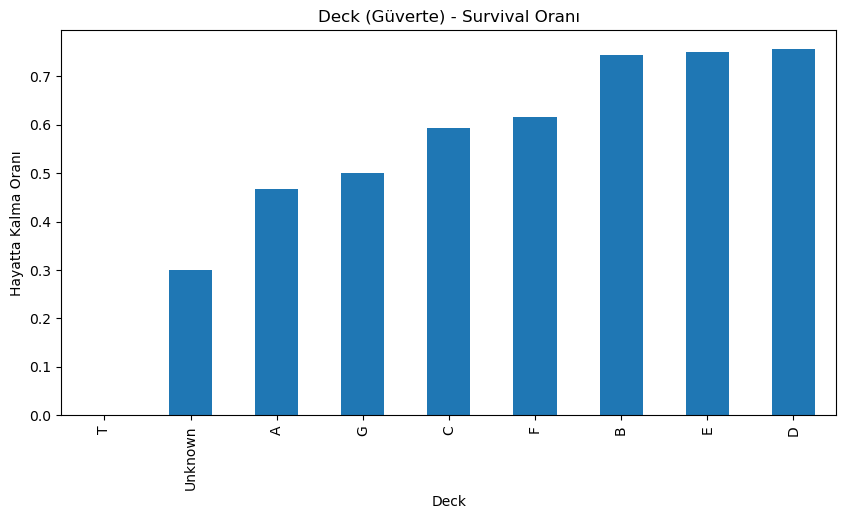

In [46]:
train.groupby("Deck")["Survived"].mean().sort_values().plot(kind = "bar" , figsize = (10,5))
plt.title("Deck (Güverte) - Survival Oranı")
plt.ylabel("Hayatta Kalma Oranı")
plt.savefig('../figures/deck_survived_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### ✅ Bulgular (Deck / Güverte - Survival)

- **En yüksek hayatta kalma oranı** genellikle üst güvertelerde görülüyor:
  - **D, E, B** güverteleri yaklaşık **%74-76** ile en avantajlı gruplar.
- **C ve F güvertelerinde** hayatta kalma oranı orta-yüksek seviyede:
  - **C ~%60**, **F ~%62**
- **A ve G güvertelerinde** hayatta kalma oranı daha düşüktür:
  - **A ~%47**, **G ~%50**
- **Cabin bilgisi bilinmeyen (Unknown)** yolcuların hayatta kalma oranı oldukça düşüktür (~%30).
- **T güvertesi** çok az gözlem içerdiği için güvenilir yorum yapmak zordur.

📌 Sonuç: Güverte bilgisi hayatta kalmayı belirgin şekilde etkiliyor.  
Üst güvertelerdeki (özellikle **B, D, E**) yolcular **can filikalarına daha yakın** oldukları için daha yüksek hayatta kalma oranına sahiptir.

In [47]:
pd.crosstab(train["Deck"], train["Pclass"], normalize="index")

Pclass,1,2,3
Deck,,,
A,1.000000,0.000000,0.000000
B,1.000000,0.000000,0.000000
C,1.000000,0.000000,0.000000
D,0.878788,0.121212,0.000000
E,0.781250,0.125000,0.093750
F,0.000000,0.615385,0.384615
G,0.000000,0.000000,1.000000
T,1.000000,0.000000,0.000000
Unknown,0.058224,0.244541,0.697234


## Name (İsim) ve Ticket (Bilet)

In [48]:
train["Title"] = train["Name"].str.extract(r",\s*([^\.]+)\.")
train["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [49]:
train.groupby("Title")["Survived"].mean().sort_values(ascending=False) * 100

Title
Lady            100.000000
Ms              100.000000
Sir             100.000000
Mme             100.000000
the Countess    100.000000
Mlle            100.000000
Mrs              79.200000
Miss             69.780220
Master           57.500000
Major            50.000000
Col              50.000000
Dr               42.857143
Mr               15.667311
Capt              0.000000
Jonkheer          0.000000
Don               0.000000
Rev               0.000000
Name: Survived, dtype: float64

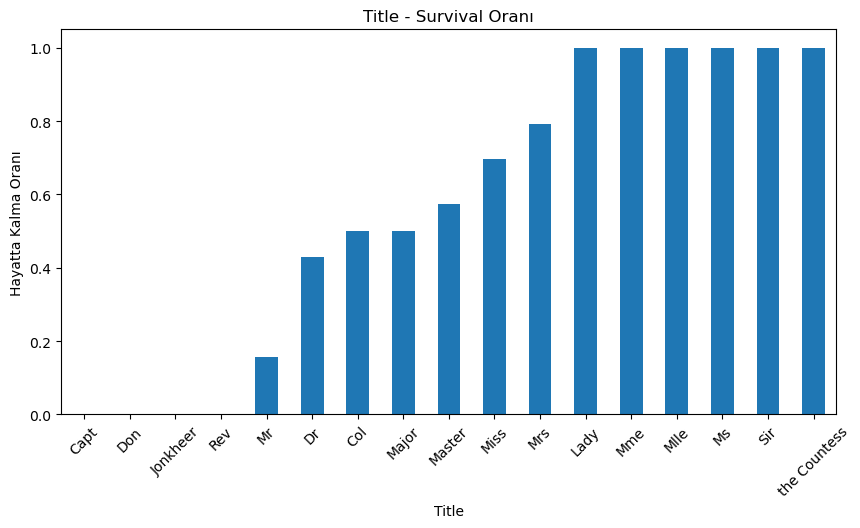

In [50]:
train.groupby("Title")["Survived"].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Title - Survival Oranı")
plt.ylabel("Hayatta Kalma Oranı")
plt.xticks(rotation=45)
plt.savefig('../figures/title_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### ✅ Bulgular (Title / Unvan - Survival)

- **Unvan değişkeni hayatta kalmayı çok güçlü şekilde etkiliyor.**
- **En düşük hayatta kalma oranı "Mr" grubunda** (yaklaşık **%15-20**).
  - Bu grup çoğunlukla yetişkin erkeklerden oluştuğu için dezavantajlı.
- **"Mrs" ve "Miss" grupları oldukça yüksek hayatta kalma oranına sahip**:
  - **Mrs ~%80**
  - **Miss ~%70**
- **"Master" (küçük erkek çocuklar)** orta-yüksek hayatta kalma oranına sahip (**~%55-60**).
- **Nadir unvanlar** (Lady, Countess, Sir, Mme, Mlle vb.) grafikte çok yüksek görünse de,
  bu gruplarda **örnek sayısı az** olduğu için sonuçlar tam güvenilir olmayabilir.
- Genel trend:  
  **Kadın unvanları ve çocuk unvanları > hayatta kalma**,  
  **yetişkin erkek unvanları (Mr) > en düşük hayatta kalma**.

📌 Sonuç: Title özelliği, Titanic verisinde hayatta kalmayı açıklamada en güçlü kategorik değişkenlerden biridir.

In [51]:
rare_titles = train["Title"].value_counts()[train["Title"].value_counts() < 10].index
rare_titles

Index(['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Ms', 'Mme', 'Don', 'Lady', 'Sir',
       'Capt', 'the Countess', 'Jonkheer'],
      dtype='object', name='Title')

In [52]:
train["Title"] = train["Title"].replace(rare_titles, "Rare")
train["Title"].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

In [53]:
train.groupby("Title")["Survived"].mean().sort_values(ascending=False) * 100

Title
Mrs       79.200000
Miss      69.780220
Master    57.500000
Rare      44.444444
Mr        15.667311
Name: Survived, dtype: float64

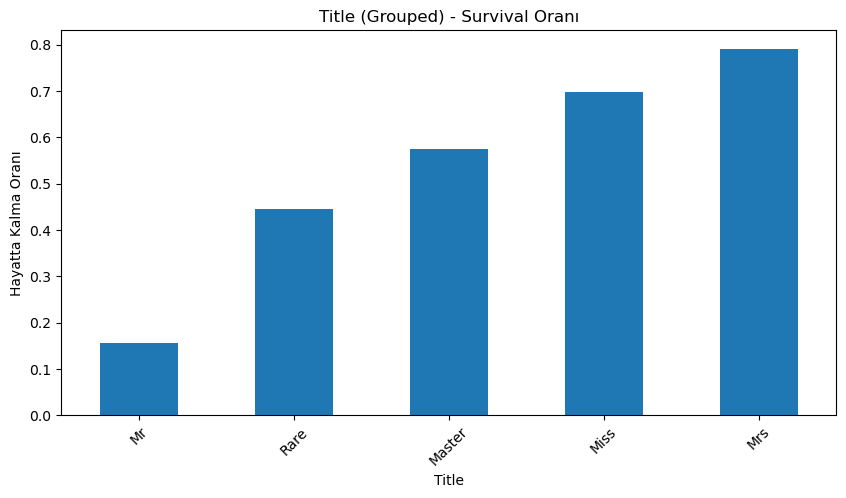

In [54]:
train.groupby("Title")["Survived"].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Title (Grouped) - Survival Oranı")
plt.ylabel("Hayatta Kalma Oranı")
plt.xticks(rotation=45)
plt.savefig('../figures/grouped_title_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### ✅ Bulgular (Title - Survival Oranı / Gruplanmış)

- **Mrs** unvanına sahip yolcuların hayatta kalma oranı en yüksektir (~%79).
- **Miss** unvanı da yüksek hayatta kalma oranına sahiptir (~%70).
- **Master** (genellikle çocuk erkekler) orta-yüksek hayatta kalma oranına sahiptir (~%57).
- **Rare** (Dr, Rev, Col, Major vb.) unvanlar orta seviyede hayatta kalma oranı göstermektedir (~%45).
- **Mr** unvanına sahip yolcuların hayatta kalma oranı en düşüktür (~%15-16).

📌 Sonuç: Unvan (Title) değişkeni hayatta kalmayı güçlü şekilde açıklamaktadır.  
Kadınları temsil eden unvanlar (**Mrs, Miss**) ve çocukları temsil eden (**Master**) gruplar belirgin şekilde daha avantajlıdır.

In [55]:
train["TicketPrefix"] = train["Ticket"].str.replace(r"\d+", "", regex=True)
train["TicketPrefix"] = train["TicketPrefix"].str.replace(r"\.", "", regex=True)
train["TicketPrefix"] = train["TicketPrefix"].str.replace(r"/", "", regex=True)
train["TicketPrefix"] = train["TicketPrefix"].str.strip()

train["TicketPrefix"] = train["TicketPrefix"].replace("", "None")
train["TicketPrefix"].value_counts()

TicketPrefix
None          661
PC             60
CA             41
A              28
STONO          18
SOTONOQ        15
WC             10
SCPARIS         7
SOC             6
C               5
FCC             5
LINE            4
SCParis         4
PP              3
WEP             3
SOPP            3
PPP             2
SOTONO          2
SCAH            2
SWPP            2
SCA             1
SP              1
SCOW            1
Fa              1
SOP             1
SC              1
SCAH Basle      1
AS              1
FC              1
CASOTON         1
Name: count, dtype: int64

In [56]:
train.groupby("TicketPrefix")["Survived"].mean().sort_values(ascending=False) * 100

TicketPrefix
SC            100.000000
SCAH Basle    100.000000
SWPP          100.000000
FCC            80.000000
PP             66.666667
PC             65.000000
SCAH           50.000000
SCParis        50.000000
PPP            50.000000
STONO          44.444444
SCPARIS        42.857143
C              40.000000
None           38.426626
CA             34.146341
WEP            33.333333
LINE           25.000000
SOC            16.666667
SOTONOQ        13.333333
WC             10.000000
A               7.142857
CASOTON         0.000000
FC              0.000000
Fa              0.000000
AS              0.000000
SCA             0.000000
SCOW            0.000000
SOP             0.000000
SP              0.000000
SOPP            0.000000
SOTONO          0.000000
Name: Survived, dtype: float64

In [57]:
train["TicketNumber"] = train["Ticket"].str.extract(r"(\d+)$").astype(float)
train[["Ticket", "TicketNumber"]].head()

,Ticket,TicketNumber
0,A/5 21171,21171.0
1,PC 17599,17599.0
2,STON/O2. 3101282,3101282.0
3,113803,113803.0
4,373450,373450.0


In [58]:
train["TicketNumber"].describe()

count    8.870000e+02
mean     2.983284e+05
std      6.576144e+05
min      3.000000e+00
25%      1.487900e+04
50%      1.122770e+05
75%      3.470820e+05
max      3.101317e+06
Name: TicketNumber, dtype: float64

# 📊 6. Çok Değişkenli Analiz

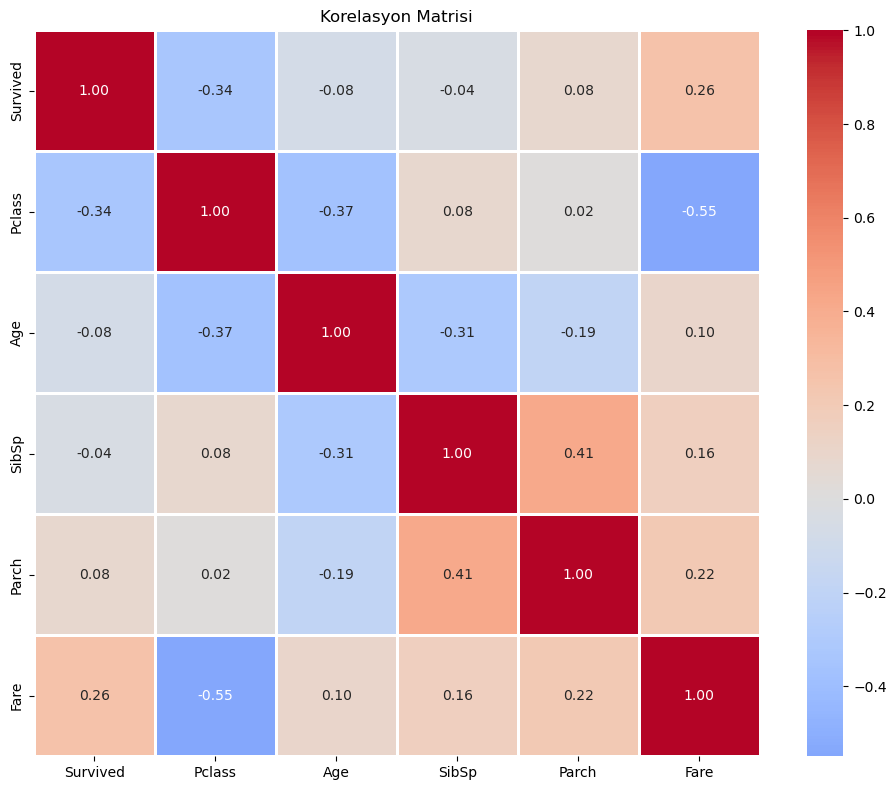

In [61]:
corr =  train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="coolwarm",center=0,square=True,linewidths=1, fmt='.2f')
plt.title("Korelasyon Matrisi")
plt.tight_layout()
plt.savefig('../figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Korelasyon Matrisi Bulguları (Titanic)

- **Survived & Pclass (-0.34)**: Orta düzey negatif ilişki → sınıf numarası arttıkça (3. sınıf) hayatta kalma azalıyor.
- **Survived & Fare (0.26)**: Zayıf-orta pozitif ilişki → bilet ücreti arttıkça hayatta kalma artıyor.
- **Survived & Age (-0.08)**: Çok zayıf negatif ilişki → yaşın hayatta kalmaya etkisi düşük.
- **Survived & SibSp (-0.04)**: Neredeyse ilişki yok.
- **Survived & Parch (0.08)**: Çok zayıf pozitif ilişki.

### Değişkenler Arası Önemli İlişkiler
- **Pclass & Fare (-0.55)**: Güçlü negatif ilişki → sınıf numarası yükseldikçe ücret ciddi şekilde düşüyor.
- **Pclass & Age (-0.37)**: Orta negatif ilişki → üst sınıflarda yolcular daha yaşlı olma eğiliminde.
- **SibSp & Parch (0.41)**: Orta pozitif ilişki → ailesiyle gelenlerin sayısı birlikte artıyor.
- **Age & SibSp (-0.31)**: Orta negatif ilişki → yaş arttıkça kardeş/eş sayısı azalıyor.

# EDA SONUÇLARI

## 🎯 En Önemli Bulgular:

1. **Cinsiyet:** En güçlü faktör
   - Kadın: %74.2 survival
   - Erkek: %18.9 survival
   
2. **Sınıf:** İkinci en önemli faktör
   - 1. sınıf: %63.0
   - 2. sınıf: %47.3
   - 3. sınıf: %24.2
   
3. **Yaş:** Çocuklar avantajlı
   - Çocuk (0-12): %59 survival
   
4. **Kombinasyonlar:**
   - 1. sınıf kadın: %96.8 (en yüksek!)
   - 3. sınıf erkek: %13.5 (en düşük)

## 📊 Hipotez Sonuçları:
- ✅ Kadınlar avantajlı
- ✅ Üst sınıf avantajlı
- ✅ Çocuklar avantajlı
- ✅ Sosyoekonomik durum kritik

## 🔧 Model için öneriler:
- Sex ve Pclass mutlaka kullan
- Age'i grupla veya eksikleri doldur
- FamilySize oluştur
- Title çıkar